# Check SED catalog

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
index_num=0
index_val=1
index_temp=2
index_logg=3
index_logz=4
index_spec=5

In [4]:
input_fits='sedgrid_phoenixmodels.fits'

In [5]:
hdul = fits.open(input_fits)

In [6]:
hdul.info()


Filename: sedgrid_phoenixmodels.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (7005, 18401)   float64   


In [7]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7005                                                  
NAXIS2  =                18401                                                  
NBSED   =                18400                                                  
NBWLBIN =                 7000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
SEDMODEL= 'phoenix '                                                            
TMIN    =               4000.0                                                  
TMAX    =              50000.0                                                  
TSTEP   =                100

In [8]:
 data = hdul[0].data

# Show all spectra

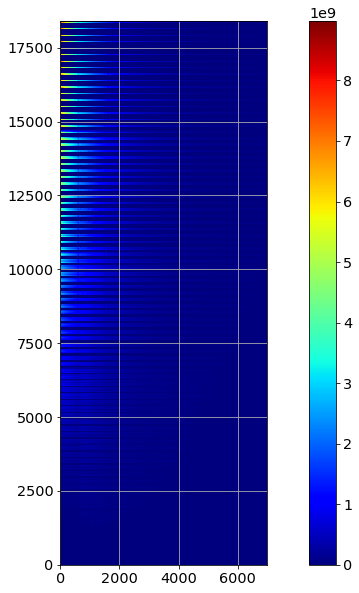

In [18]:
plt.figure(figsize=(15,10))    
img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

# Show wavelength range

Text(0.5,0,u'Wavelength index')

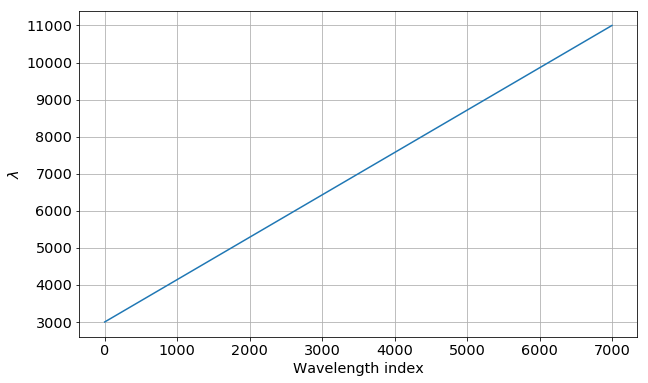

In [37]:
plt.plot(data[0,index_spec:])
plt.grid()
plt.ylabel("$\lambda$")
plt.xlabel("Wavelength index")

# Show good and bad indexes 

## Good indexes

In [21]:
good_indexes=np.where(data[0:,index_val]>0)[0]

In [22]:
good_indexes

array([    1,     2,     3, ..., 18390, 18391, 18392])

Text(0.5,0,u'temperature')

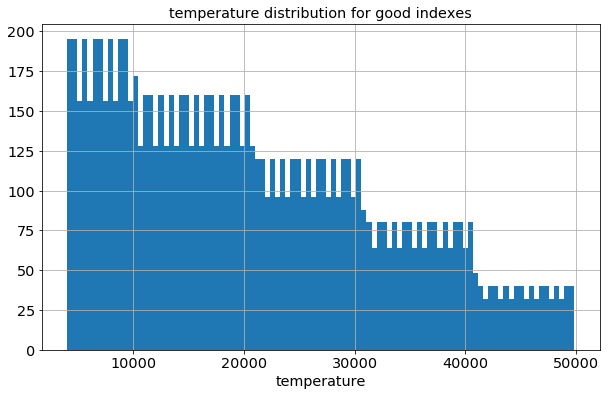

In [32]:
plt.hist(data[good_indexes,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for good indexes')
plt.xlabel('temperature')

Text(0.5,0,u'log(G)')

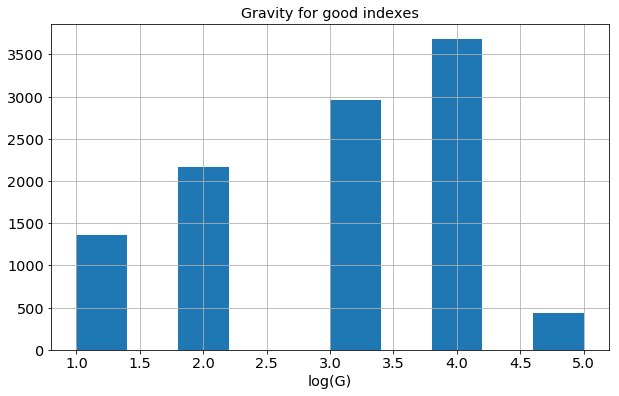

In [42]:
plt.hist(data[good_indexes,index_logg],bins=10);
plt.grid()
plt.title('Gravity for good indexes')
plt.xlabel('log(G)')

Text(0.5,0,u'log(Z)')

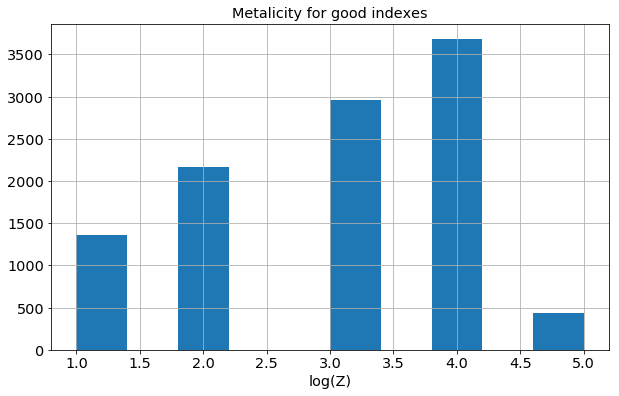

In [44]:
plt.hist(data[good_indexes,index_logg],bins=10);
plt.grid()
plt.title('Metalicity for good indexes')
plt.xlabel('log(Z)')

## Bad indexes

In [23]:
bad_indexes=np.where(data[0:,index_val]<=0)[0]

Text(0.5,0,u'temperature')

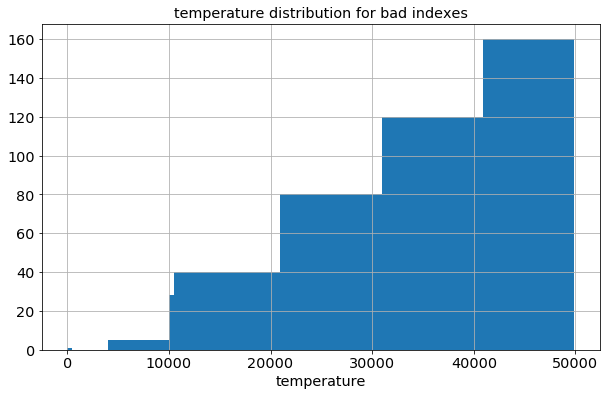

In [33]:
plt.hist(data[bad_indexes,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for bad indexes')
plt.xlabel('temperature')

Text(0.5,0,u'log(G)')

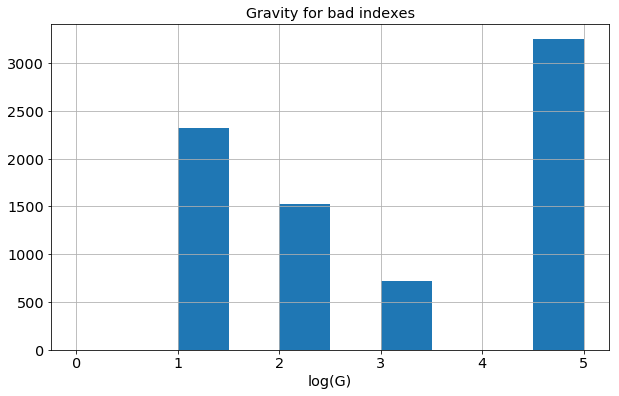

In [45]:
plt.hist(data[bad_indexes,index_logg],bins=10);
plt.grid()
plt.title('Gravity for bad indexes')
plt.xlabel('log(G)')

Text(0.5,0,u'log(Z)')

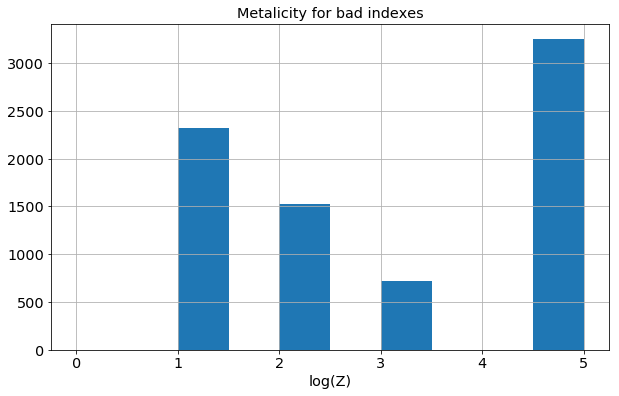

In [46]:
plt.hist(data[bad_indexes,index_logg],bins=10);
plt.grid()
plt.title('Metalicity for bad indexes')
plt.xlabel('log(Z)')

# Select good indexes

In [38]:
good_image=data[good_indexes,:]

In [39]:
good_image.shape

(10592, 7005)

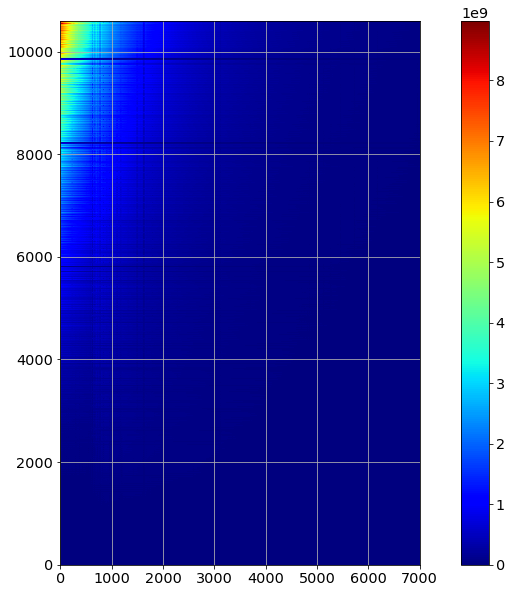

In [40]:
plt.figure(figsize=(15,10))   
img=plt.imshow(good_image[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

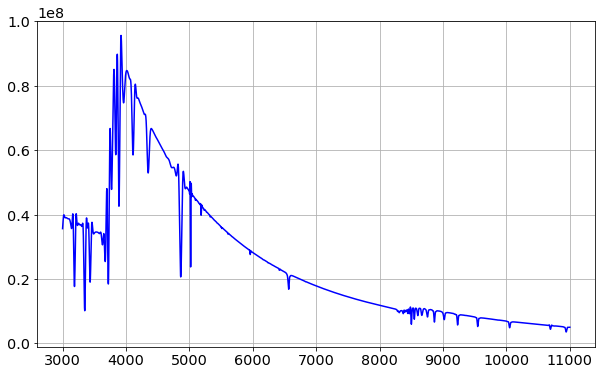

In [16]:
plt.plot(data[0,index_spec:],good_image[2000,index_spec:],'b-')
plt.grid()

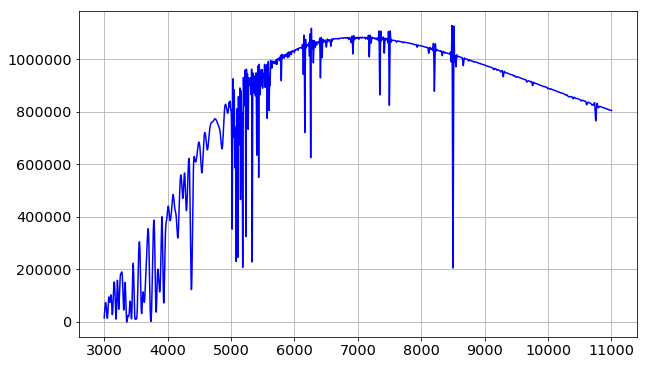

In [17]:
plt.plot(data[0,index_spec:],good_image[0,index_spec:],'b-')
plt.grid()